# Plotting

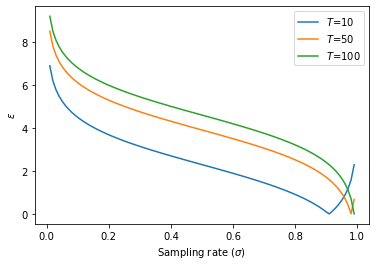

In [277]:
#Plot epsilon as Plie increases for algo Sampling

%run useful_functions.ipynb



Taus=[10,50,100]        
x_coordinates = []
y_coordinates_dict=dict()
legend=dict()
for Tau in Taus:
    y_coordinates_dict[Tau]=[]
    legend[Tau]=("$T$={}".format(Tau))

    

    
P=0.01
while P<1:
    x_coordinates.append(P)
    for Tau in Taus:
        y_coordinates_dict[Tau].append(eps_sampling(Tau, P))
    P=P+0.01


fig2=plot_selection(x_coordinates, y_coordinates_dict,legend)


plt.xlabel('Sampling rate ($\sigma$) ')
plt.ylabel('$\\varepsilon$')
#plt.title('$\\varepsilon$ for different values of $\\tau$ as $P_{lie}$ increases ')
plt.savefig('Epsilon-for-Plie-Sampling.pdf')  


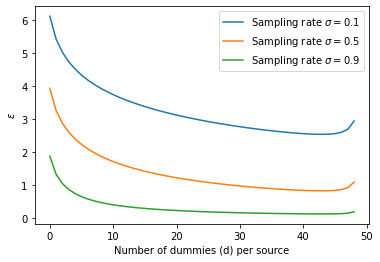

In [278]:
#Plot epsilon as d increases for sampling+flooding
%run useful_functions.ipynb


Tau=50
Plies=[0.1,0.5,0.9]        
x_coordinates = []
y_coordinates_dict=dict()
legend=dict()
for P in Plies:
    y_coordinates_dict[P]=[]
    legend[P]=("Sampling rate $\sigma={}$".format(P))

    

    
    
for d in range(Tau-1):
    x_coordinates.append(d)
    for P in Plies:
        y_coordinates_dict[P].append(eps_baseline(Tau, d, P))
    


fig2=plot_selection(x_coordinates, y_coordinates_dict,legend)

plt.xlabel('Number of dummies (d) per source')
plt.ylabel('$\\varepsilon$')
#plt.title('$\\varepsilon$ for different values of $P_{lie}$ as d increases ')
plt.savefig('epsilon-baseline.pdf')  

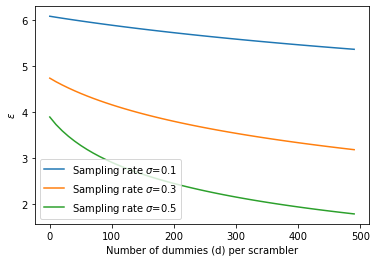

In [225]:
%run useful_functions.ipynb
delta = 1e-3
tau=50
n=100


Plies=[0.1,0.3,0.5]  

x_coordinates = []
y_coordinates_dict=dict()
legend=dict()

for P in Plies:
    y_coordinates_dict['P={}'.format(P)]=[]
    legend['P={}'.format(P)]="Sampling rate $\sigma$={}".format(P)
        


d=0
n=500
while d <500:
    x_coordinates.append(d)
    
    for P in Plies:
        y_coordinates_dict['P={}'.format(P)].append(eps_algo_old_formula2(tau,n,d, P))
    d=d+10
           

        
plot_selection(x_coordinates, y_coordinates_dict,legend)
plt.xlabel('Number of dummies (d) per scrambler')
plt.ylabel('$\\varepsilon$')
#plt.title('$\\varepsilon$ as the number of dummies "d" increases')

plt.savefig('epsilon-algo-exact-formula2.pdf')  

#plt.ylim(0, 7)
    

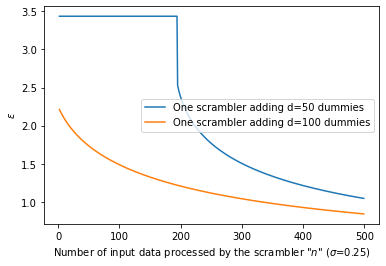

In [2]:
%run useful_functions.ipynb
delta = 1e-3
tau=10



Plies=[0.25]  
ds=[50,100]
x_coordinates = []
y_coordinates_dict=dict()
legend=dict()
for d in ds:
    for P in Plies:
        y_coordinates_dict['P={},d={}'.format(P,d)]=[]
        legend['d={}'.format(d)]="One scrambler adding d={} dummies".format(d)
        


n=2
while n <500:
    x_coordinates.append(n)
    for d in ds:
        for P in Plies:
            y_coordinates_dict['P={},d={}'.format(P,d)].append(eps_algo(tau,n,d, P,delta))
    n=n+1
           

plt.plot(x_coordinates, y_coordinates_dict['P={},d={}'.format(0.25,50)], label=legend['d={}'.format(50)])
plt.plot(x_coordinates, y_coordinates_dict['P={},d={}'.format(0.25,100)], label=legend['d={}'.format(100)])

plt.legend()
    
    
plt.xlabel('Number of input data processed by the scrambler "$n$" ($\sigma$={})'.format(P))
plt.ylabel('$\\varepsilon$')
#plt.title('$\\varepsilon$ en fonction de la taille du buffer "n" Balle section T={}'.format(tau))

plt.savefig('epsilon-algo-buffer_plie_fixe.pdf')


    

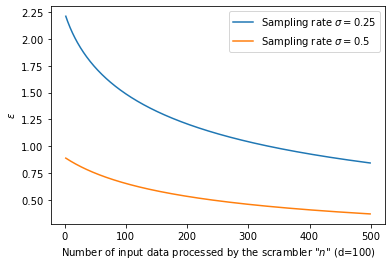

In [1]:
%run useful_functions.ipynb
delta = 1e-3
tau=10



Plies=[0.25,0.5]  
ds=[100]
x_coordinates = []
y_coordinates_dict=dict()
legend=dict()
for d in ds:
    for P in Plies:
        y_coordinates_dict['P={},d={}'.format(P,d)]=[]
        legend['P={}'.format(P)]="Sampling rate $\sigma={}$".format(P)
        


n=2
while n <500:
    x_coordinates.append(n)
    for d in ds:
        for P in Plies:
            y_coordinates_dict['P={},d={}'.format(P,d)].append(eps_algo(tau,n,d, P,delta))
    n=n+1
           

plt.plot(x_coordinates, y_coordinates_dict['P={},d={}'.format(0.25,100)], label=legend['P={}'.format(0.25)])
plt.plot(x_coordinates, y_coordinates_dict['P={},d={}'.format(0.5,100)], label=legend['P={}'.format(0.5)])

plt.legend()


plt.xlabel('Number of input data processed by the scrambler "$n$" (d={})'.format(d))
plt.ylabel('$\\varepsilon$')
plt.savefig('epsilon-algo-buffer_d_fixe.pdf')



    

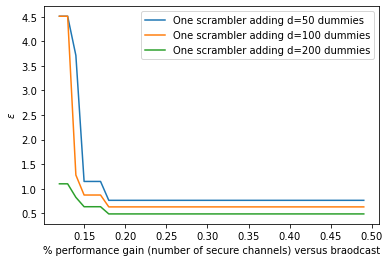

In [275]:
#Quel epsilon espérer pour un taux donnée (secure channels) T=10
%run useful_functions.ipynb
tau=10
n=100
N=10000
d=0
delta = 1e-3

MaxPlies=[0.4]  
Maxns=[300]
Maxds=[50,100,200]

x_coordinates_dict = dict()
y_coordinates_dict=dict()
legend=dict()
for Maxd in Maxds:
    for Maxn in Maxns:
        for MaxPlie in MaxPlies:
            y_coordinates_dict['P={},n={},d={}'.format(MaxPlie,Maxn,Maxd)]=[]
            x_coordinates_dict['P={},n={},d={}'.format(MaxPlie,Maxn,Maxd)]=[]
            legend['P={},n={},d={}'.format(MaxPlie,Maxn,Maxd)]="One scrambler adding d={} dummies".format(Maxd)
        


MaxTaux=0.01
while MaxTaux <=0.5:
    x_coordinates.append(MaxTaux)
    for Maxd in Maxds:
        for Maxn in Maxns:
            for MaxPlie in MaxPlies:
                if len(tuning_secure_channels2(MaxTaux,Maxn,MaxPlie,Maxd))>0:
                    y_coordinates_dict['P={},n={},d={}'.format(MaxPlie,Maxn,Maxd)].append(tuning_secure_channels2(MaxTaux,Maxn,MaxPlie,Maxd)[0])
                    x_coordinates_dict['P={},n={},d={}'.format(MaxPlie,Maxn,Maxd)].append(MaxTaux)
    MaxTaux=MaxTaux+0.01


for y_coordinates in y_coordinates_dict:
    plt.plot(x_coordinates_dict[y_coordinates], y_coordinates_dict[y_coordinates], label=legend[y_coordinates])
plt.legend()
    



plt.xlabel('% performance gain (number of secure channels) versus braodcast')
plt.ylabel('$\\varepsilon$')
#plt.title('$\\varepsilon$ en fonction du taux de secure channels vs broadcast')
#plt.yscale('log')
plt.savefig('taux_secure_channels.pdf')

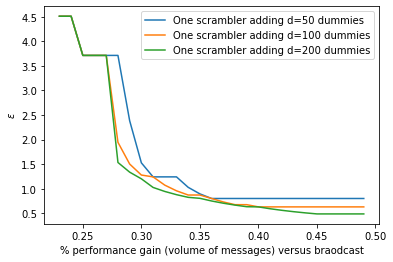

In [276]:
#Quel epsilon espérer pour un taux donnée (messages)
%run useful_functions.ipynb
tau=10
n=100
N=10000
d=0
delta = 1e-3


MaxPlies=[0.4]  
Maxns=[300]
Maxds=[50,100,200]



x_coordinates_dict = dict()
y_coordinates_dict=dict()
legend=dict()
for Maxd in Maxds:
    for Maxn in Maxns:
        for MaxPlie in MaxPlies:
            y_coordinates_dict['P={},n={},d={}'.format(MaxPlie,Maxn,Maxd)]=[]
            x_coordinates_dict['P={},n={},d={}'.format(MaxPlie,Maxn,Maxd)]=[]
            legend['P={},n={},d={}'.format(MaxPlie,Maxn,Maxd)]="One scrambler adding d={} dummies".format(Maxd)
        


MaxTaux=0.2
while MaxTaux <=0.5:
    x_coordinates.append(MaxTaux)
    for Maxd in Maxds:
        for Maxn in Maxns:
            for MaxPlie in MaxPlies:
                if len(tuning_messages(MaxTaux,Maxn,MaxPlie,Maxd))>0:
                    y_coordinates_dict['P={},n={},d={}'.format(MaxPlie,Maxn,Maxd)].append(tuning_messages(MaxTaux,Maxn,MaxPlie,Maxd)[0])
                    x_coordinates_dict['P={},n={},d={}'.format(MaxPlie,Maxn,Maxd)].append(MaxTaux)
    MaxTaux=MaxTaux+0.01


for y_coordinates in y_coordinates_dict:
    plt.plot(x_coordinates_dict[y_coordinates], y_coordinates_dict[y_coordinates], label=legend[y_coordinates])
plt.legend()
    



plt.xlabel('% performance gain (volume of messages) versus braodcast')
plt.ylabel('$\\varepsilon$')
#plt.title('$\\varepsilon$ en fonction du taux de messages vs broadcast')
plt.savefig('taux_messages.pdf')

0.314


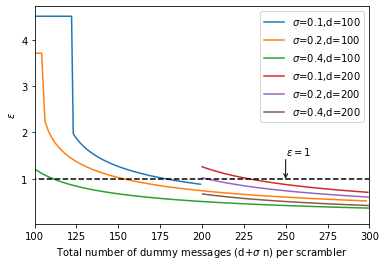

In [259]:

%run useful_functions.ipynb
tau=10
N=10000
delta = 1e-3
Plies=[0.1,0.2,0.4]  
ds=[100,200]
x_coordinates_dict = dict()
y_coordinates_dict=dict()
legend=dict()
for d in ds:
    for P in Plies:
        y_coordinates_dict['P={},d={}'.format(P,d)]=[]
        x_coordinates_dict['P={},d={}'.format(P,d)]=[]
        legend['P={},d={}'.format(P,d)]="$\sigma$={},d={}".format(P,d)
        


n=1
while n <1000:
    x_coordinates.append(n)
    for d in ds:
        for P in Plies:
            y_coordinates_dict['P={},d={}'.format(P,d)].append(eps_algo(tau,n,n*P+d, P,delta))
            x_coordinates_dict['P={},d={}'.format(P,d)].append(n*P+d)
    n=n+10


for y_coordinates in y_coordinates_dict:
    plt.plot(x_coordinates_dict[y_coordinates], y_coordinates_dict[y_coordinates], label=legend[y_coordinates])
plt.legend()

plt.annotate('$\\varepsilon=1$', xy=(250, 1), xytext=(250, 1.5),
            arrowprops=dict(arrowstyle="->",
                            shrinkA=0, shrinkB=20,
                            connectionstyle="angle,angleA=0,angleB=90,rad=10"),
            )

X=[0,500]
Y=[1,1]
plt.plot(X, Y,'k--')

plt.xlabel('Total number of dummy messages (d+$\sigma$ n) per scrambler')
plt.ylabel('$\\varepsilon$')

plt.xlim(100, 300)
print(quel_taux_messages(tau,N,200,0.2,100))
plt.savefig('epsilon-algo-zoom_d_fixe.pdf')